In [1]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt
import json

import util.collection_util as cu

## Dataset Path

In [2]:
dataset_dir = r'E:\Work\YasuoNet\data\dataset_sl5.0_vsr3.0_vw64_vh64_asr11025'

In [3]:
with open(os.path.join(dataset_dir, 'metadata.json')) as f:
    metadata = json.load(f)
metadata

{'created': '2020-08-06 07:35:31.988117',
 'config': {'segment_length': 5.0,
  'video_sample_rate': 3.0,
  'video_width': 64,
  'video_height': 64,
  'audio_sample_rate': 11025},
 'total_segment_count': 88933,
 'segment_counts': {'20200216_T1_GEN_2': 633,
  '20200411_APK_HLE_1': 769,
  '20200215_AF_DRX_1': 826,
  '20200208_GEN_GRF_1': 689,
  '20200420_DRX_DWG_1': 677,
  '20200404_GEN_DRX_1': 763,
  '20200205_T1_DWG_2': 827,
  '20200327_SB_GRF_2': 664,
  '20200425_GEN_T1_3': 819,
  '20200402_AF_APK_2': 749,
  '20200325_KT_DWG_1': 718,
  '20200214_GRF_APK_3': 868,
  '20200409_SB_T1_2': 681,
  '20200228_APK_DRX_1': 719,
  '20200208_APK_DWG_2': 614,
  '20200220_KT_APK_2': 709,
  '20200420_DRX_DWG_2': 664,
  '20200206_GRF_AF_1': 1051,
  '20200329_T1_HLE_1': 667,
  '20200304_HLE_APK_1': 760,
  '20200405_HLE_AF_2': 645,
  '20200227_HLE_DWG_1': 774,
  '20200415_GEN_KT_3': 753,
  '20200219_DRX_T1_2': 674,
  '20200213_KT_T1_2': 633,
  '20200221_DRX_GEN_3': 669,
  '20200215_HLE_SB_2': 790,
  '202

## Target Segment Path

In [4]:
segment_path = os.path.join(dataset_dir, r'20200212_GRF_SB_2\seg_00589_1.pkl')

In [5]:
segment = cu.load(segment_path)

In [6]:
segment.keys()

dict_keys(['video', 'audio', 'label', 'start_sec', 'end_sec', 'total_duration'])

In [7]:
segment['start_sec'], segment['end_sec'], segment['total_duration']

(2945.0, 2950.0, 3805.38)

## Label

In [8]:
segment['label']

1

## Video

In [9]:
video = segment['video']
video.shape, video.dtype

((15, 64, 64, 3), dtype('float16'))

In [10]:
rowscols = math.ceil(math.sqrt(video.shape[0]))
rowscols

4

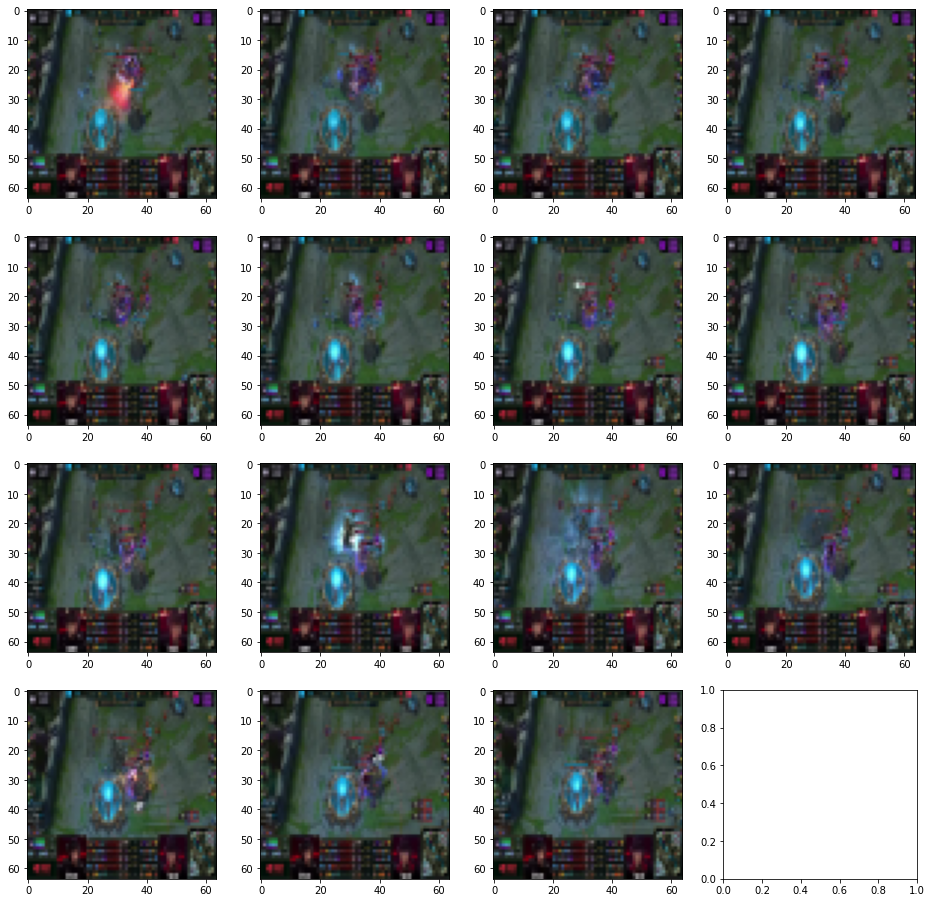

In [11]:
fig, axes = plt.subplots(rowscols, rowscols, figsize=(16, 16))
axes = axes.flatten()

for ax, image in zip(axes, video):
    ax.imshow(image.astype(np.float32))

## Audio

In [12]:
audio = segment['audio']
audio.shape, audio.dtype

((55125, 2), dtype('float16'))

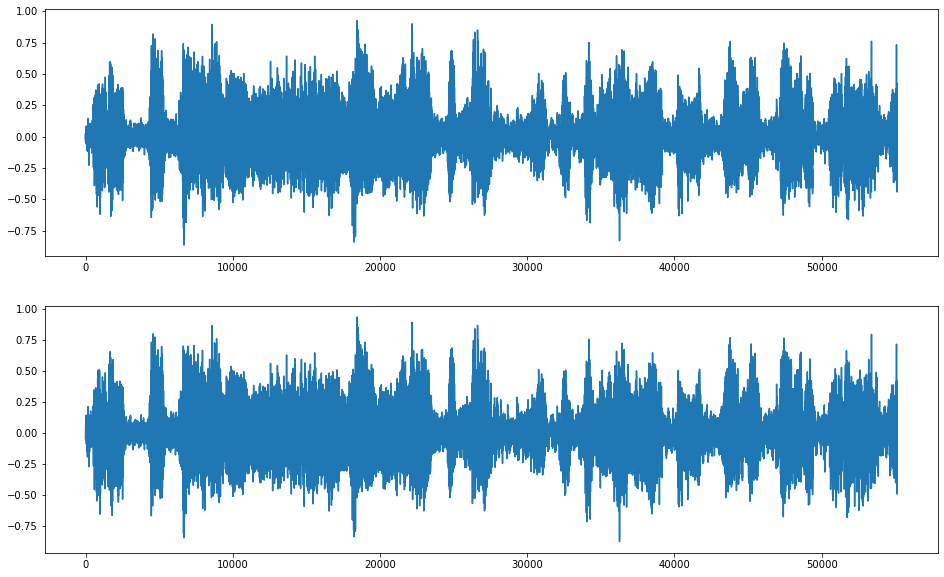

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

for ax, channel in zip(axes, audio.T):
    ax.plot(channel)